In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
# Load JSON file
with open('final_data.json', 'r') as file:
    data = json.load(file)

In [6]:
print(data[0])
print(data[0].keys())

{'article': '(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC\'s founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians\' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wednesday

In [10]:
print(data[0]['original_model_all_data'][1])

10.75377869606018


In [13]:
original_model_all_times = [entry['original_model_all_data'][1] for entry in data]
fine_tuned_model_all_times = [entry['fine_tuned_model_all_data'][1] for entry in data]

In [23]:
# Basic Stats

import numpy as np

def print_inference_stats(times, model_name):
    times = np.array(times)
    print(f"--- {model_name} ---")
    print(f"Mean:    {np.mean(times):.4f} sec")
    print(f"Median:  {np.median(times):.4f} sec")
    print(f"Std Dev: {np.std(times):.4f} sec")
    print(f"Min:     {np.min(times):.4f} sec")
    print(f"Max:     {np.max(times):.4f} sec")
    print()

print_inference_stats(original_model_all_times, "Model A")
print_inference_stats(fine_tuned_model_all_times, "Model B")


--- Model A ---
Mean:    11.4647 sec
Median:  11.3639 sec
Std Dev: 1.5827 sec
Min:     8.9727 sec
Max:     16.8651 sec

--- Model B ---
Mean:    7.5664 sec
Median:  7.3395 sec
Std Dev: 2.2447 sec
Min:     3.5611 sec
Max:     17.9274 sec



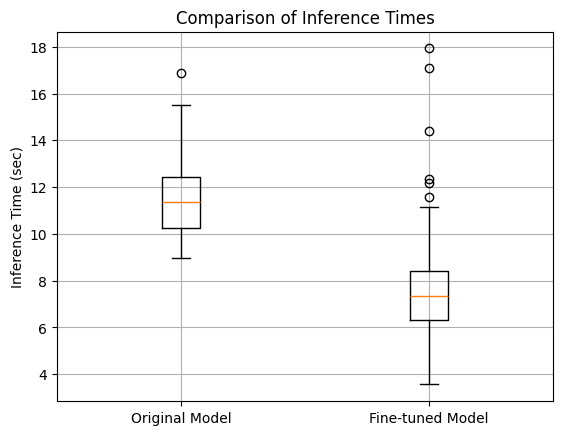

In [24]:
import matplotlib.pyplot as plt

# Box Plot (for quick comparison of median, spread, outliers)
plt.boxplot([original_model_all_times, fine_tuned_model_all_times], labels=["Original Model", "Fine-tuned Model"])
plt.ylabel("Inference Time (sec)")  # or whatever unit
plt.title("Comparison of Inference Times")
plt.grid(True)
plt.show()

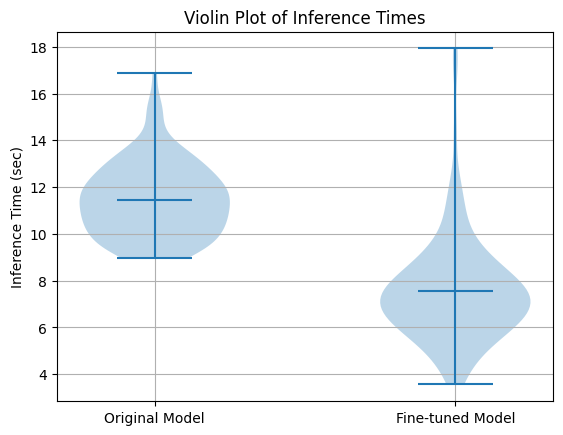

In [25]:
# Violin Plot (fancier version of boxplot + distribution)

plt.violinplot([original_model_all_times, fine_tuned_model_all_times], showmeans=True)
plt.xticks([1, 2], ["Original Model", "Fine-tuned Model"])
plt.ylabel("Inference Time (sec)")
plt.title("Violin Plot of Inference Times")
plt.grid(True)
plt.show()

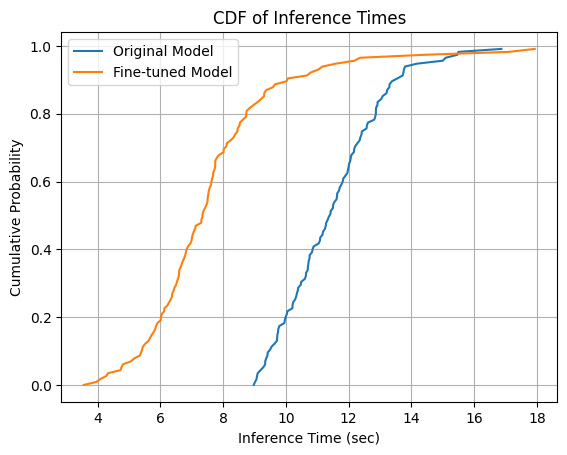

In [26]:
# Cumulative Distribution Function (CDF) (good for seeing which model is faster X% of the time)

# Sort the times
original_model_all_times_sorted = np.sort(original_model_all_times)
fine_tuned_model_all_times_sorted = np.sort(fine_tuned_model_all_times)

# Compute cumulative probabilities
cdf_original_times = np.arange(len(original_model_all_times_sorted)) / len(original_model_all_times_sorted)
cdf_fine_tuned_times = np.arange(len(fine_tuned_model_all_times_sorted)) / len(fine_tuned_model_all_times_sorted)

plt.plot(original_model_all_times_sorted, cdf_original_times, label="Original Model")
plt.plot(fine_tuned_model_all_times_sorted, cdf_fine_tuned_times, label="Fine-tuned Model")
plt.xlabel("Inference Time (sec)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Inference Times")
plt.legend()
plt.grid(True)
plt.show()